# Phase 1: Setup and Data Loading

In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')

In [10]:
data_path = '../data/water_potability.csv' 
df = pd.read_csv(data_path)


In [16]:
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [14]:
print(df.describe().T)

                  count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  

# Phase 2: Data Cleaning and Imputation

In [20]:
# The ph, Sulfate, and Trihalomethanes columns have missing values. Use Median Imputation as it is robust against outliers.

In [22]:
#Count NaNs

In [24]:
print(df.isnull().sum().sort_values(ascending=False))

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64


In [26]:
median_values = df.median()

In [28]:
df.fillna(median_values, inplace=True)

In [30]:
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


# Phase 3: Exploratory Data Analysis (Visualization)

## Target Analysis

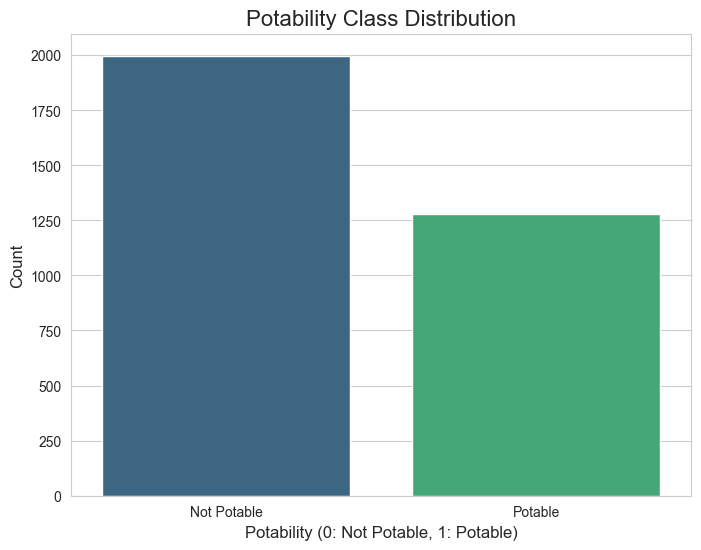

In [96]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Potability', data=df, hue='Potability', palette='viridis', legend=False)
plt.title('Potability Class Distribution', fontsize=16)
plt.xlabel('Potability (0: Not Potable, 1: Potable)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Not Potable', 'Potable'])
plt.show()

## Univariate Analysis (Feature Distributions & Outliers)

In [ ]:
#Distribution Plots

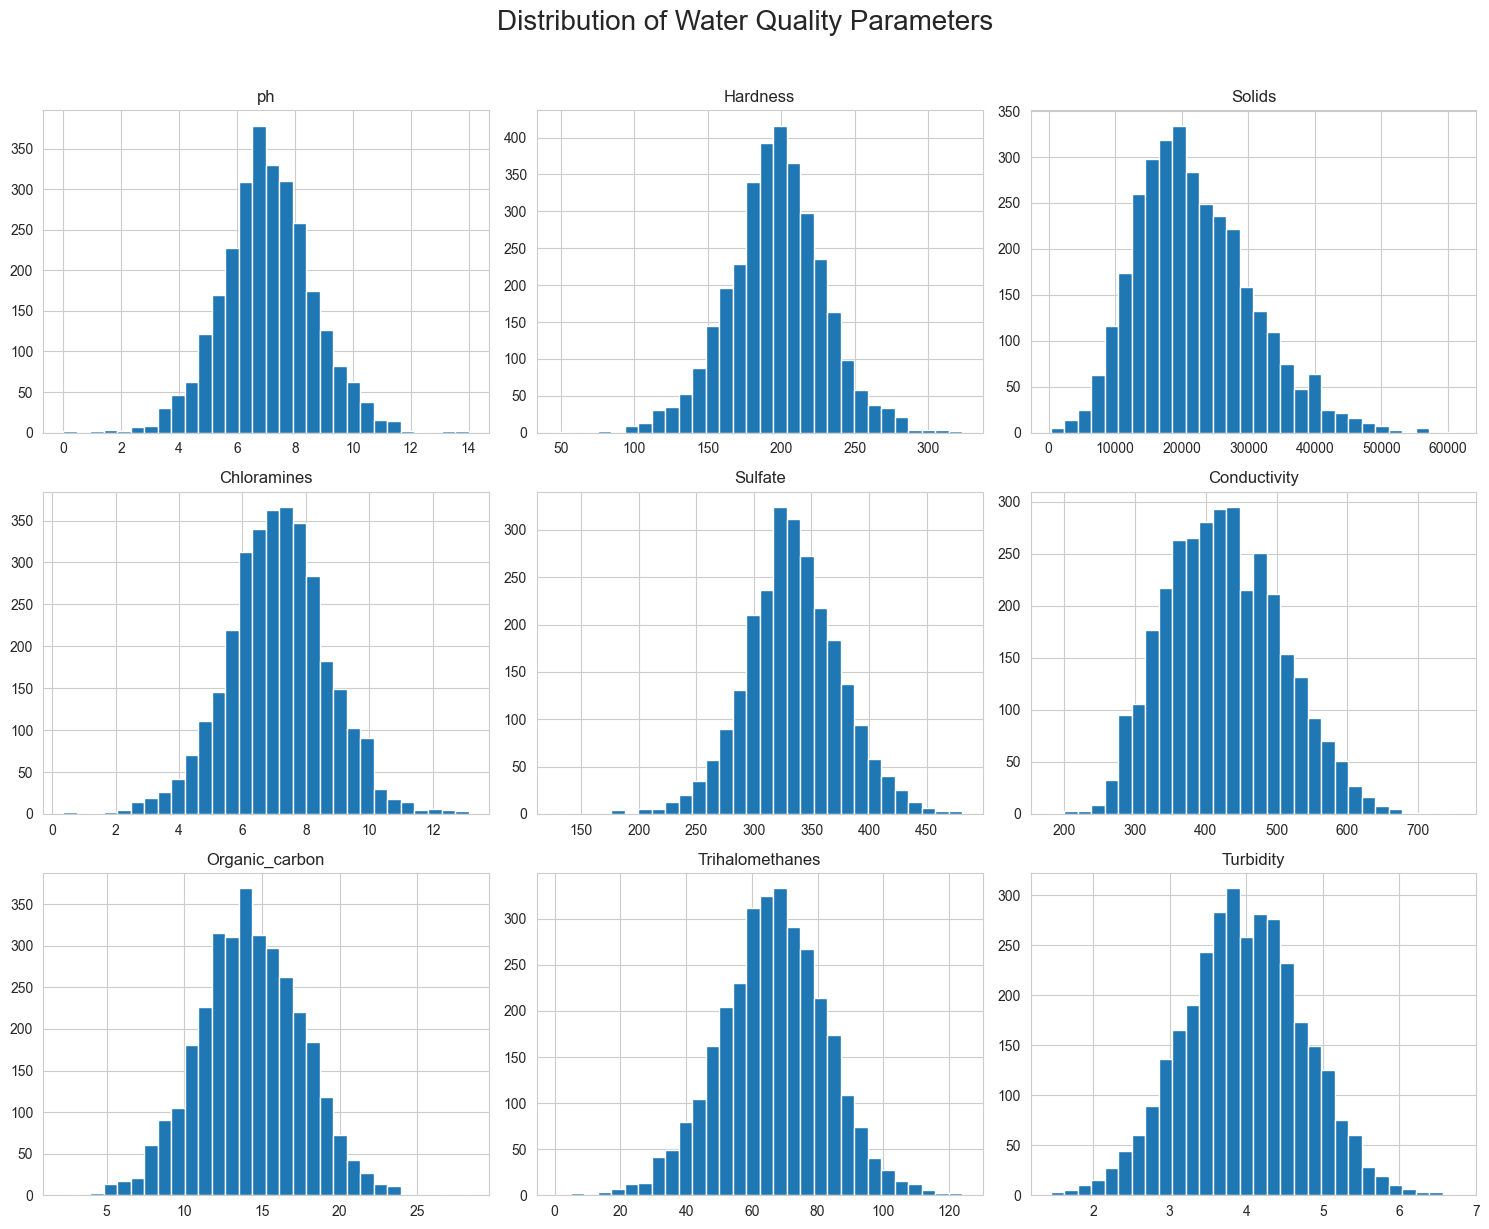

In [100]:
df.drop('Potability', axis=1).hist(figsize=(15, 12), bins=30)
plt.suptitle('Distribution of Water Quality Parameters', y=1.02, fontsize=20)
plt.tight_layout()
plt.show()

In [59]:
# Outlier Plots

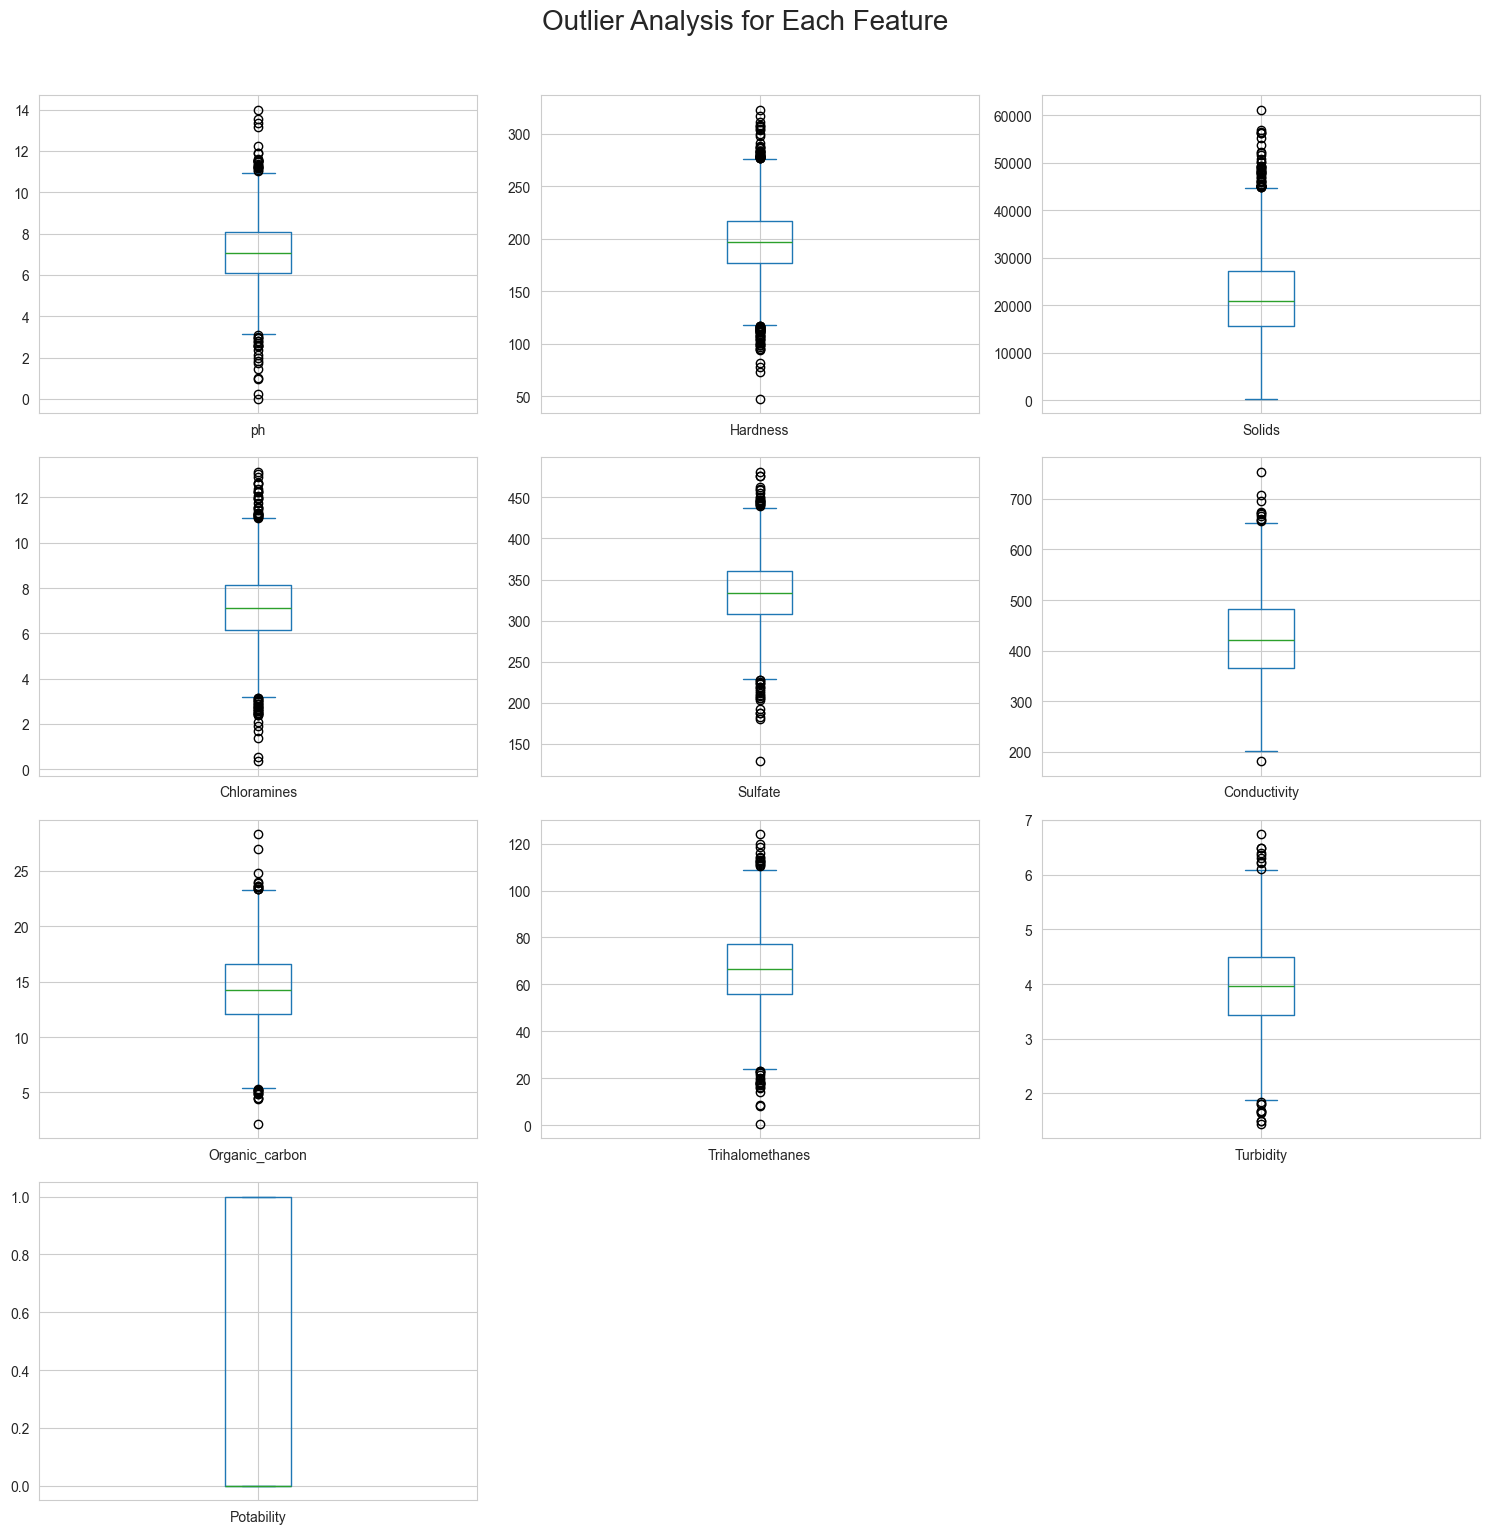

In [108]:
df.plot(kind='box', subplots=True, layout=(4, 3), figsize=(15, 15))
plt.suptitle('Outlier Analysis for Each Feature', y=1.02, fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
#Correlation Heatmap

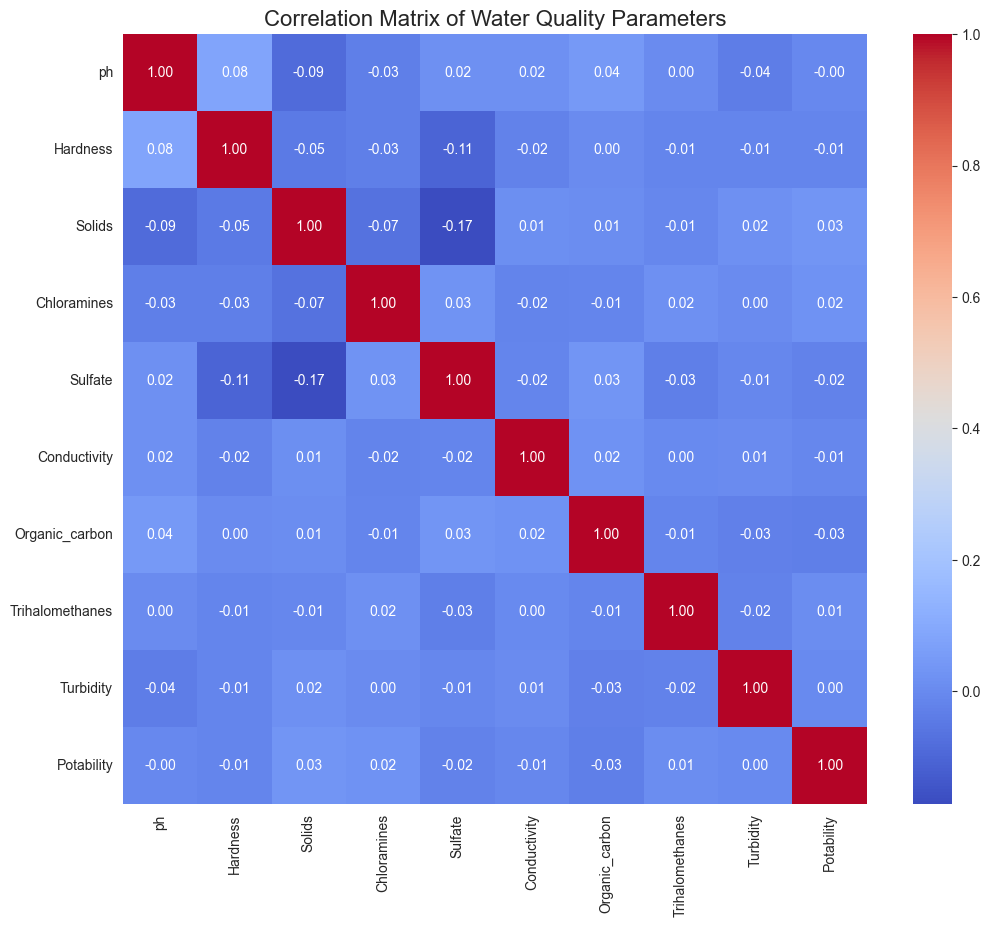

In [112]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Water Quality Parameters', fontsize=16)
plt.show()

In [ ]:
# Feature vs. Target (Box Plots)

<Axes: xlabel='Potability', ylabel='Hardness'>

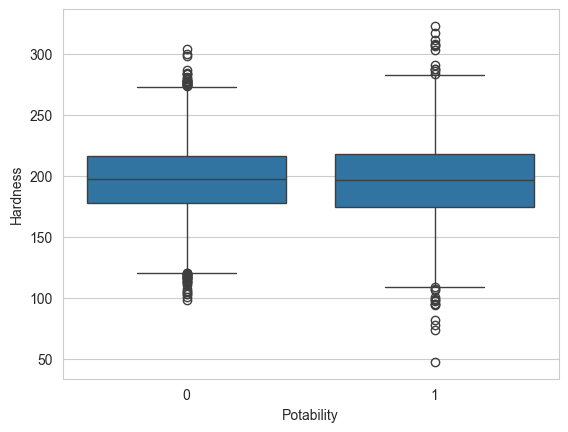

In [69]:
sns.boxplot(x='Potability', y='Hardness', data=df)

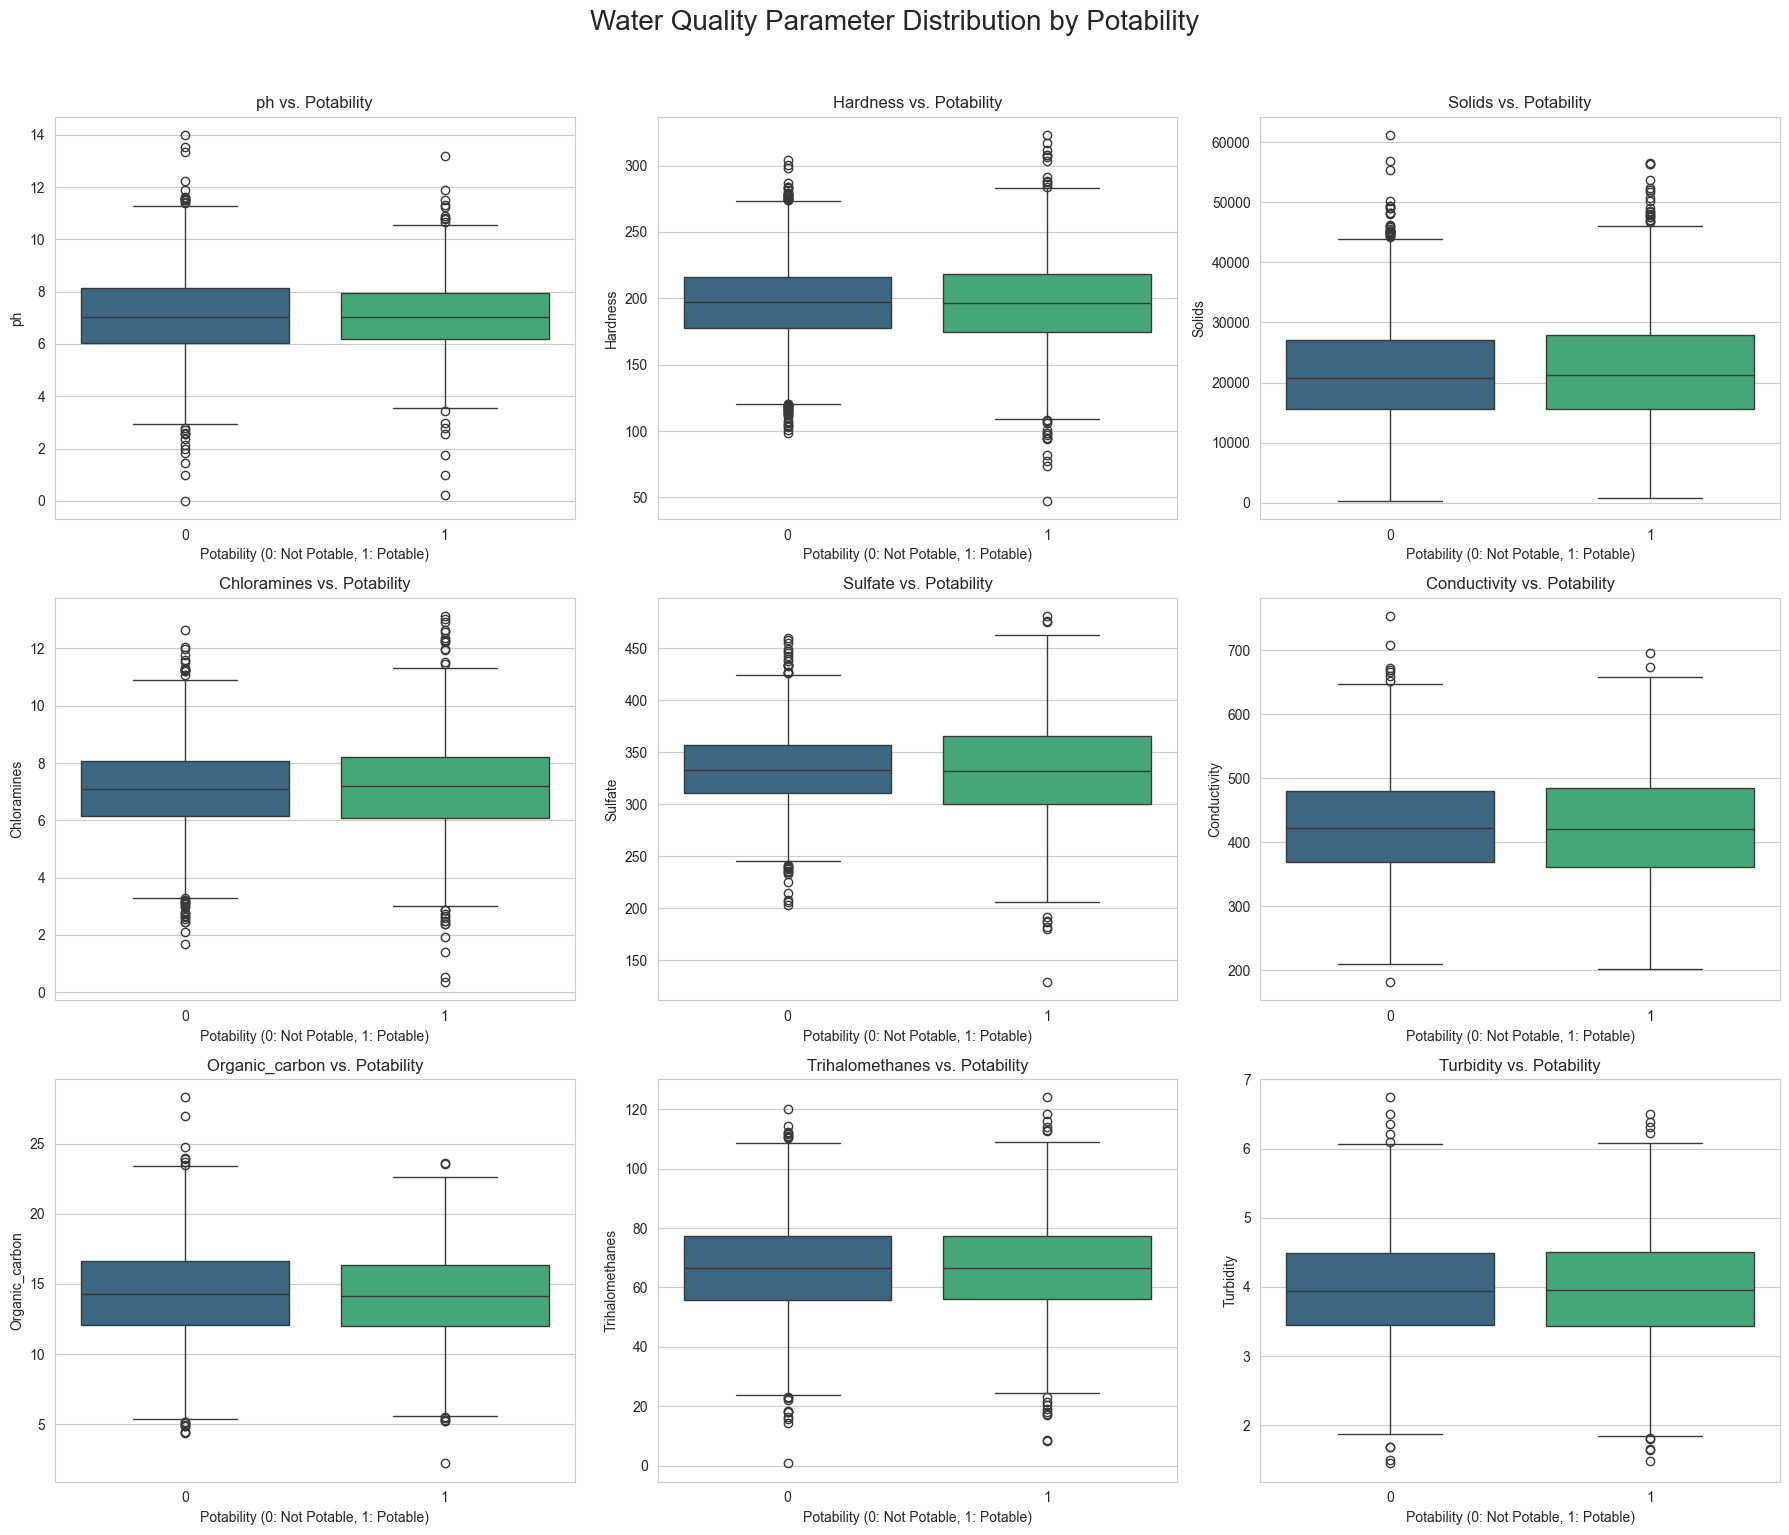

In [116]:
# Assuming 'df' is your cleaned DataFrame after median imputation.

# 1. Define the features list (all columns except the target 'Potability')
features_to_plot = df.drop(columns=['Potability']).columns.tolist()
n_features = len(features_to_plot) # Should be 9

# 2. Set up the figure and subplot grid (e.g., 3 rows and 3 columns for 9 features)
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 15))
plt.suptitle('Water Quality Parameter Distribution by Potability', y=1.02, fontsize=20)

# 3. Loop through the features and create a box plot for each
for i, feature in enumerate(features_to_plot):
    # Calculate row and column indices for the subplot
    row_index = i // cols
    col_index = i % cols
    
    # Create the box plot
    sns.boxplot(
        x='Potability', 
        y=feature, 
        data=df, 
        ax=axes[row_index, col_index], 
       #palette='viridis' # Use a distinct color palette
        hue='Potability',  # Explicitly assign the x variable to hue
        palette='viridis',
        legend=False       # Set legend=False as recommended since hue is x
    )
    
    # Customize the plot
    axes[row_index, col_index].set_title(f'{feature} vs. Potability')
    axes[row_index, col_index].set_xlabel('Potability (0: Not Potable, 1: Potable)')
    axes[row_index, col_index].set_ylabel(feature)

# 4. Adjust layout to prevent overlaps
plt.tight_layout()
plt.show()


In [71]:
# Distribution vs. Target

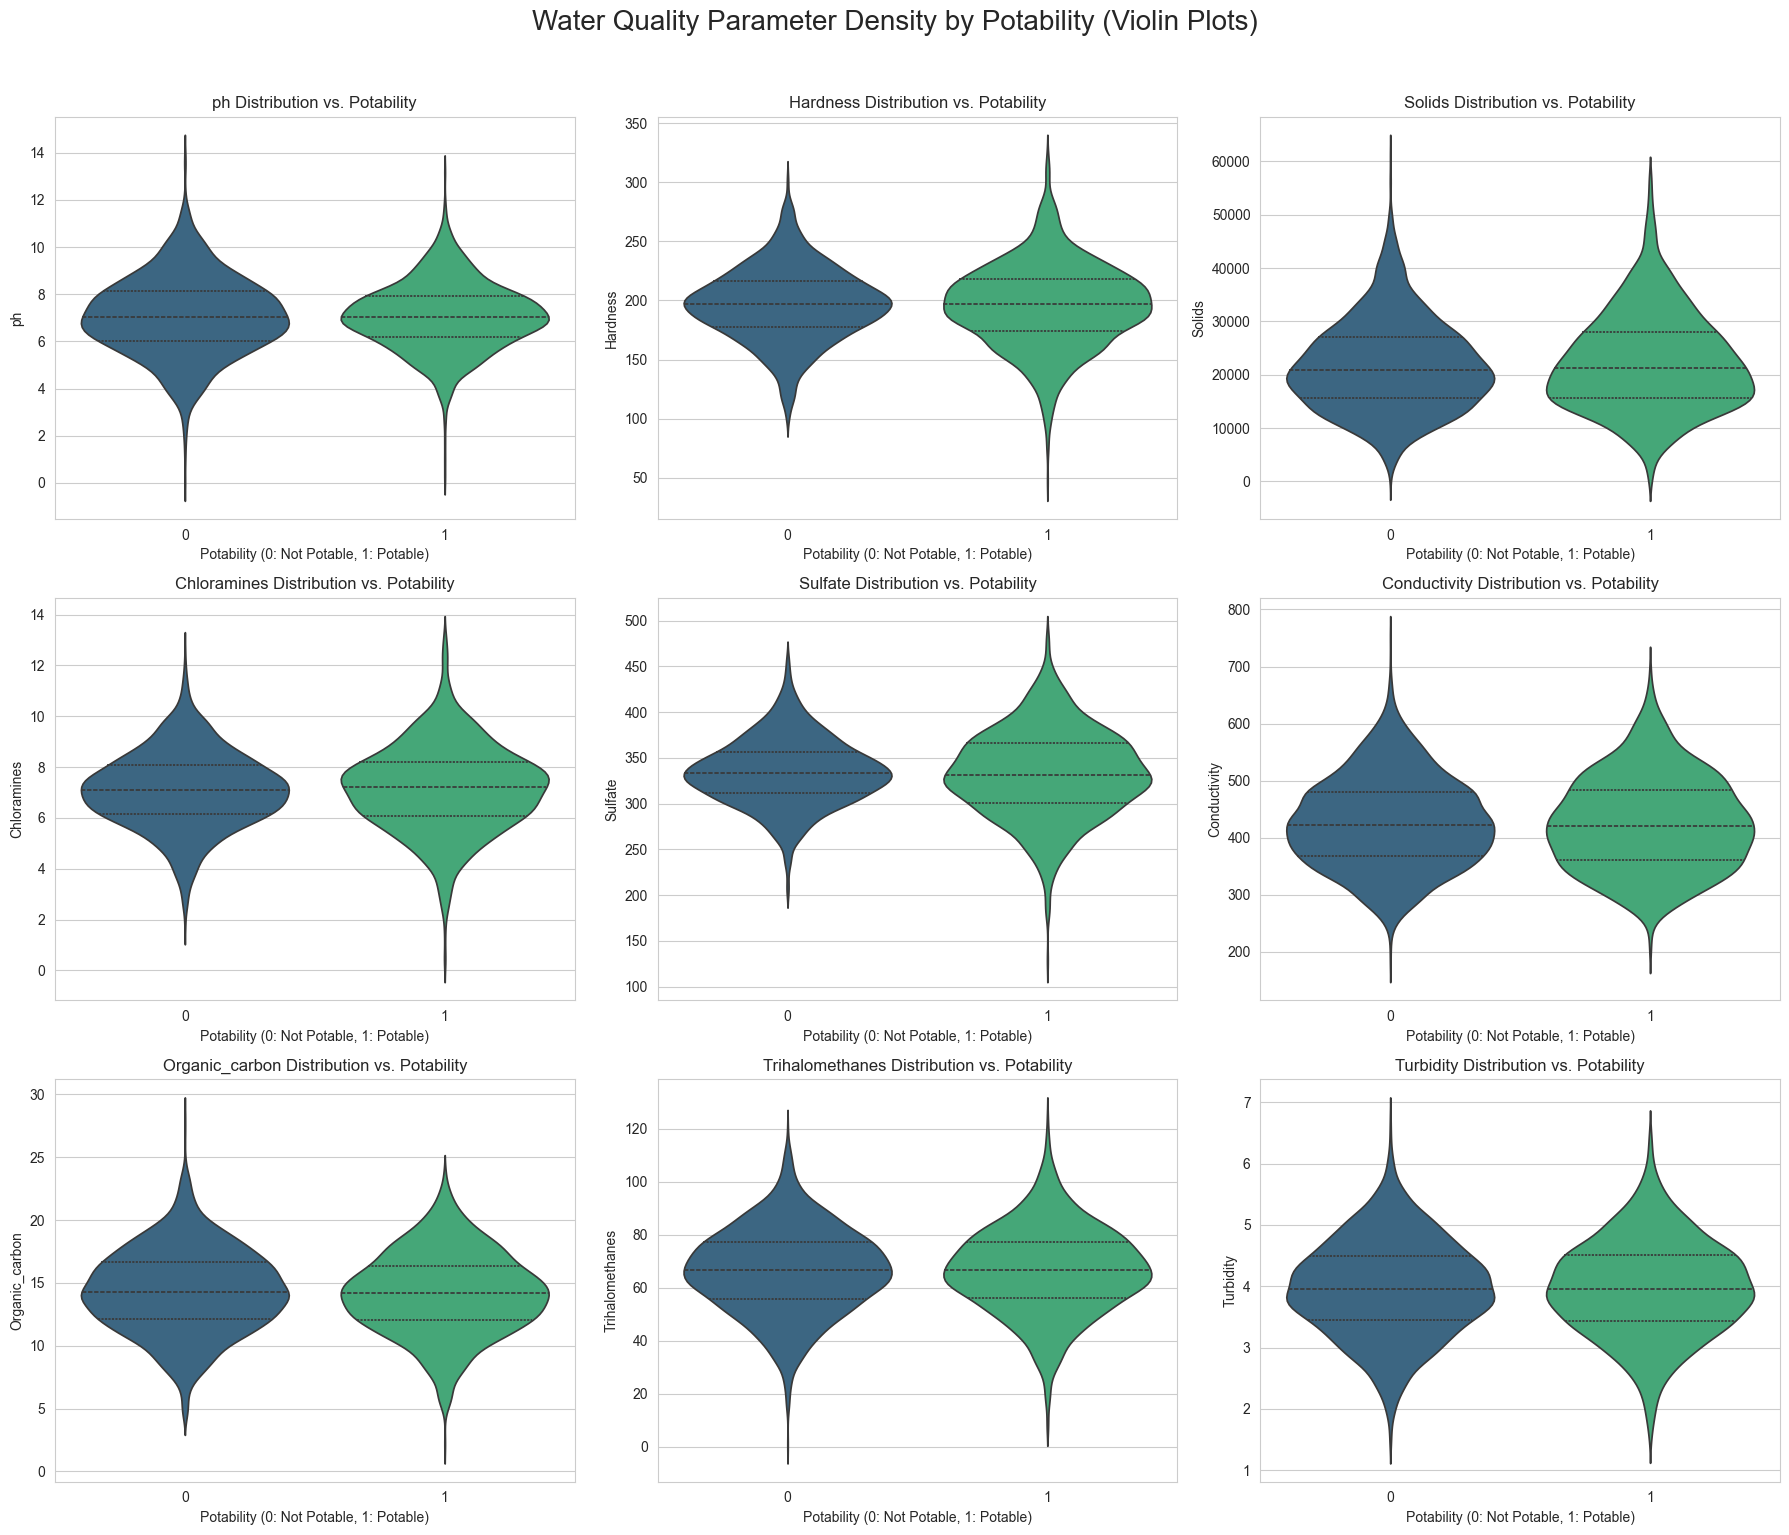

In [114]:
# Define the features list
features_to_plot = df.drop(columns=['Potability']).columns.tolist()
n_features = len(features_to_plot)

# Set up the figure and subplot grid
rows = 3
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 15))
plt.suptitle('Water Quality Parameter Density by Potability (Violin Plots)', y=1.02, fontsize=20)

# Loop through the features and create a violin plot for each
for i, feature in enumerate(features_to_plot):
    row_index = i // cols
    col_index = i % cols
    
    sns.violinplot(
        x='Potability', 
        y=feature, 
        data=df, 
        ax=axes[row_index, col_index], 
        hue='Potability',
        split=False,
        palette='viridis',
        inner='quartile',
        legend=False
    )
    
    axes[row_index, col_index].set_title(f'{feature} Distribution vs. Potability')
    axes[row_index, col_index].set_xlabel('Potability (0: Not Potable, 1: Potable)')
    axes[row_index, col_index].set_ylabel(feature)

# Adjust layout and save
plt.tight_layout()
plt.savefig('all_features_vs_potability_violinplots.png', dpi=300, bbox_inches='tight')
plt.show()

# EDA SUMMARY REPORT: Water Potability Analysis

This report summarizes the data quality assessment and key insights derived from the Exploratory Data Analysis (EDA) performed on the `water_potability.csv` dataset. The goal of this analysis is to inform the preprocessing steps for the upcoming Baseline Model.

---

## 1. Data Quality and Preprocessing Decisions

### 1.1 Missing Data Handling

* **Columns Affected:** Three features contained missing values (NaNs): `ph`, `Sulfate`, and `Trihalomethanes`.
* **Strategy:** Due to the continuous nature of these features, all missing values were imputed using the **median** of the respective column to minimize the effect of potential outliers.
* **Verification:** After imputation, the dataset contains a total of **3276** samples with zero null values.

### 1.2 Feature Scaling
* The `df.describe().T` output showed vast differences in feature scales (e.g., `Solids` values are much larger than `ph` values).
* **Decision:** All features will require **Standard Scaling** during the Baseline Model preparation to normalize their variance and ensure all features contribute equally to the distance calculation.

---

## 2. Key Findings and Predictive Insights

### 2.1 Target Variable Analysis (Potability)

* **Total Samples:** 3276
* **Class Distribution:**
    * Not Potable (0): **1998** samples (approx. **60.99**% of data).
    * Potable (1): **1278** samples (approx. **39.01**% of data).
* **Conclusion:** The dataset exhibits a noticeable **class imbalance** (approx. **61:39**). Therefore, the Baseline Model evaluation must rely on robust metrics like the **F1-Score** and **ROC-AUC** rather than simple accuracy.

### 2.2 Feature-to-Target Relationships

The correlation analysis and visualization (Box Plots/Violin Plots) revealed that no single feature is strongly correlated with the target variable.

| Feature | Correlation with Potability | Predictive Observation |
| :--- | :--- | :--- |
| **Solids** | **+0.0337** | Has the highest positive correlation, suggesting a slight tendency for higher total dissolved solids in potable samples. |
| **Chloramines** | **+0.0238** | Minimal positive correlation; visual separation between classes is very low. |
| **Trihalomethanes** | **+0.0069** | Virtually no correlation. |
| **Turbidity** | **+0.0016** | Correlation is negligible. |
| **ph** | **-0.0030** | Almost zero correlation. |
| **Conductivity** | **-0.0081** | Almost zero correlation. |
| **Hardness** | **-0.0138** | Very weak negative correlation; classes overlap significantly in box plots. |
| **Sulfate** | **-0.0205** | Very weak negative correlation; visual separation in box plots is minimal. |
| **Organic\_carbon** | **-0.0300** | The strongest negative correlation (though still very weak), suggesting a subtle tendency for lower organic carbon in potable samples. |

### 2.3 Feature-to-Feature Correlations
* All features show very low correlation with the `Potability` target (absolute maximum correlation is **0.0337** for `Solids`). This implies the prediction task is complex, and the model will need to learn non-linear interactions between multiple features rather than relying on a single dominant parameter.
* No significant multi-collinearity was observed among the input features (i.e., no two input features are highly correlated with each other).

---

## Conclusion and Preparation for Baseline

The data is now cleaned and analyzed. The analysis confirms a complex, imbalanced classification problem with no single strong predictor. The next phase, **Baseline Model Implementation**, will proceed with the following steps: **Stratified Train-Test Split** and **Standard Scaling** before training a simple classifier.